In [8]:
import pandas as pd
import seaborn as sns


## PART 1

In [9]:
# Quiestion 1

diamonds = sns.load_dataset('diamonds')
diamonds.to_pickle('diamonds.pkl')

In [10]:
# Question 1

diamonds = pd.read_pickle('diamonds.pkl')
diamonds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [11]:
# Question 2
# Select only numeric columns
numeric_data = diamonds.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()

<Axes: >

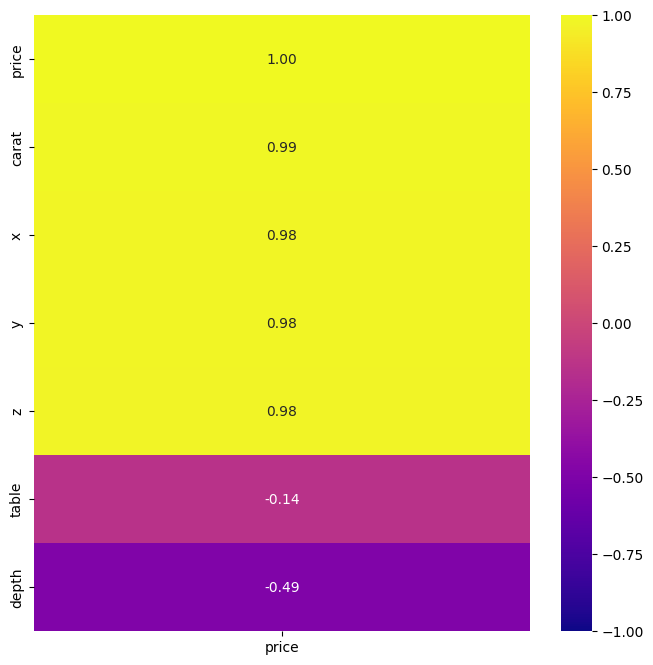

In [12]:
# Question 2

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation.corr()[['price']].sort_values('price', ascending=False),
            annot=True, cmap='plasma', vmin=-1, vmax=1, fmt='.2f')

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
# Question 3 and 4

x_train, x_test, y_train, y_test = train_test_split(
    diamonds[['carat', 'table', 'depth']], diamonds[['price']],
    test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [15]:
# Question 5

model.score(x_test, y_test)

0.8532031629541938

In [16]:
# Question 6

model.score(x_train, y_train)

0.8538570928448128

In [17]:
# Question 7

y_predicted = model.predict(x_test)

In [18]:
# Question 8

predicted = pd.DataFrame(y_predicted, columns=['predictedPrice'])
final = predicted.join([x_test.reset_index(drop=True),
                       y_test.reset_index(drop=True)])
final[['carat', 'table', 'depth', 'price', 'predictedPrice']]

,carat,table,depth,price,predictedPrice
0,0.24,56.0,62.1,559,-350.845462
1,0.58,57.0,60.0,2201,2530.703395
2,0.40,55.0,62.1,1238,1013.986507
3,0.43,57.0,60.8,1304,1231.507829
4,1.55,55.0,62.3,6901,10032.632811
...,...,...,...,...,...
16177,0.41,59.0,61.2,705,802.807750
16178,1.06,55.0,63.0,5278,6073.132721
16179,1.51,60.0,60.8,13157,9411.348349
16180,0.71,61.0,58.9,2960,3293.447090


In [19]:
# Question 9

final['residuals'] = final.price - final.predictedPrice
final

,predictedPrice,carat,table,depth,price,residuals
0,-350.845462,0.24,56.0,62.1,559,909.845462
1,2530.703395,0.58,57.0,60.0,2201,-329.703395
2,1013.986507,0.40,55.0,62.1,1238,224.013493
3,1231.507829,0.43,57.0,60.8,1304,72.492171
4,10032.632811,1.55,55.0,62.3,6901,-3131.632811
...,...,...,...,...,...,...
16177,802.807750,0.41,59.0,61.2,705,-97.807750
16178,6073.132721,1.06,55.0,63.0,5278,-795.132721
16179,9411.348349,1.51,60.0,60.8,13157,3745.651651
16180,3293.447090,0.71,61.0,58.9,2960,-333.447090


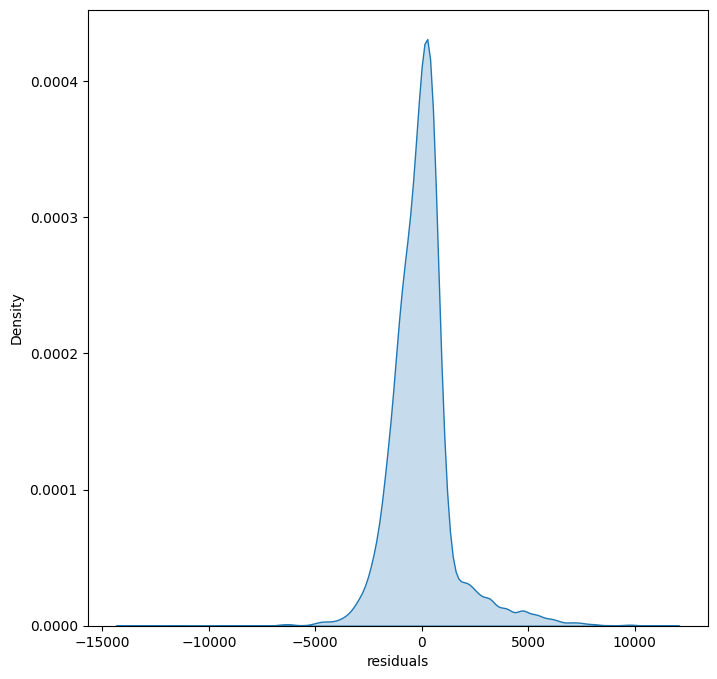

In [20]:
# Question 10
plt.figure(figsize=(8,8))
sns.kdeplot(final, x='residuals', fill=True)
plt.show()

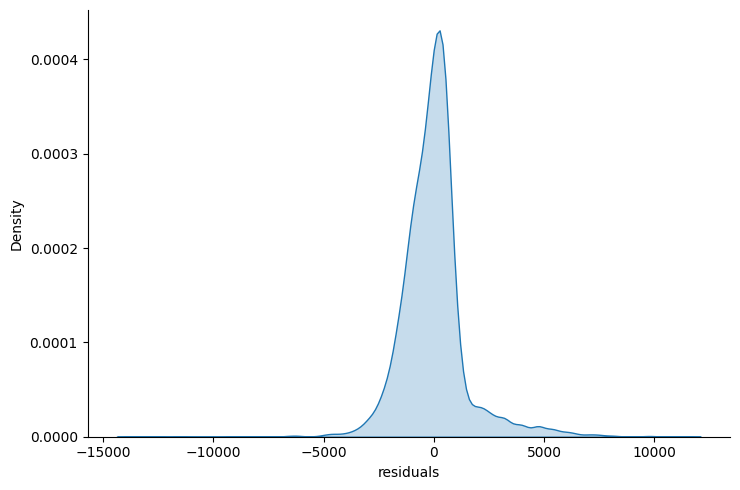

In [21]:
# Question 10

sns.displot(final, x='residuals', kind='kde', height=5, aspect=1.5, fill=True)

## PART 2


In [22]:
# Question 1

diamonds = pd.read_pickle('diamonds.pkl')
diamonds= diamonds.drop(columns=['x', 'y', 'z'])
diamonds.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [23]:
# Question 2

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
dtypes: category(3), float64(3), int64(1)
memory usage: 1.8 MB


In [24]:
# Question 3

categoryColumns = ['cut', 'color', 'clarity']
dummies = pd.get_dummies(diamonds[categoryColumns])
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   cut_Ideal      53940 non-null  bool 
 1   cut_Premium    53940 non-null  bool 
 2   cut_Very Good  53940 non-null  bool 
 3   cut_Good       53940 non-null  bool 
 4   cut_Fair       53940 non-null  bool 
 5   color_D        53940 non-null  bool 
 6   color_E        53940 non-null  bool 
 7   color_F        53940 non-null  bool 
 8   color_G        53940 non-null  bool 
 9   color_H        53940 non-null  bool 
 10  color_I        53940 non-null  bool 
 11  color_J        53940 non-null  bool 
 12  clarity_IF     53940 non-null  bool 
 13  clarity_VVS1   53940 non-null  bool 
 14  clarity_VVS2   53940 non-null  bool 
 15  clarity_VS1    53940 non-null  bool 
 16  clarity_VS2    53940 non-null  bool 
 17  clarity_SI1    53940 non-null  bool 
 18  clarity_SI2    53940 non-null  bool 
 19  clar

In [25]:
# Question 4

diamondDummies = diamonds.drop(columns=categoryColumns)
diamondDummies = diamondDummies.join(dummies)
diamondDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  bool   
 5   cut_Premium    53940 non-null  bool   
 6   cut_Very Good  53940 non-null  bool   
 7   cut_Good       53940 non-null  bool   
 8   cut_Fair       53940 non-null  bool   
 9   color_D        53940 non-null  bool   
 10  color_E        53940 non-null  bool   
 11  color_F        53940 non-null  bool   
 12  color_G        53940 non-null  bool   
 13  color_H        53940 non-null  bool   
 14  color_I        53940 non-null  bool   
 15  color_J        53940 non-null  bool   
 16  clarity_IF     53940 non-null  bool   
 17  clarity_VVS1   53940 non-null  bool   
 18  clarit

In [26]:
# Question 5
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numcols = ['carat', 'depth', 'table']
diamondDummies[numcols] = scaler.fit_transform(diamondDummies[numcols])
diamondDummies.head()

,carat,depth,table,price,cut_Ideal,cut_Premium,cut_Very Good,cut_Good,cut_Fair,color_D,...,color_I,color_J,clarity_IF,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,-1.198168,-0.174092,-1.099672,326,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,-1.240361,-1.360738,1.585529,326,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,-1.198168,-3.385019,3.375663,327,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,-1.071587,0.454133,0.242928,334,False,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,-1.029394,1.082358,0.242928,335,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False


In [27]:
# Question 6 - Correlation with corr() function
diamondDummies.corr()[['price']]

,price
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
cut_Ideal,-0.097175
cut_Premium,0.095706
cut_Very Good,0.006593
cut_Good,-0.000312
cut_Fair,0.018728
color_D,-0.072473


<Axes: >

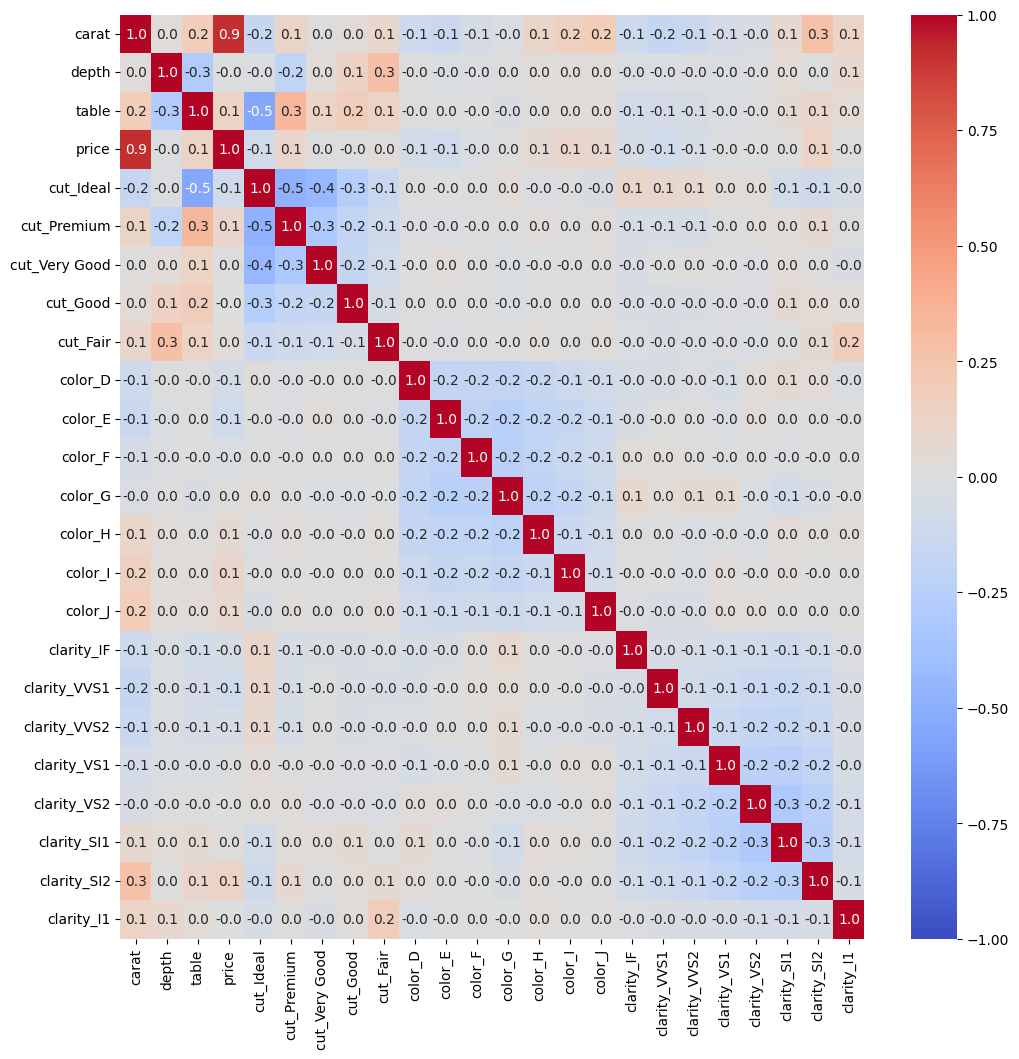

In [28]:
# Question 6 - With Heatmap
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=diamondDummies.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.1f')

<Axes: >

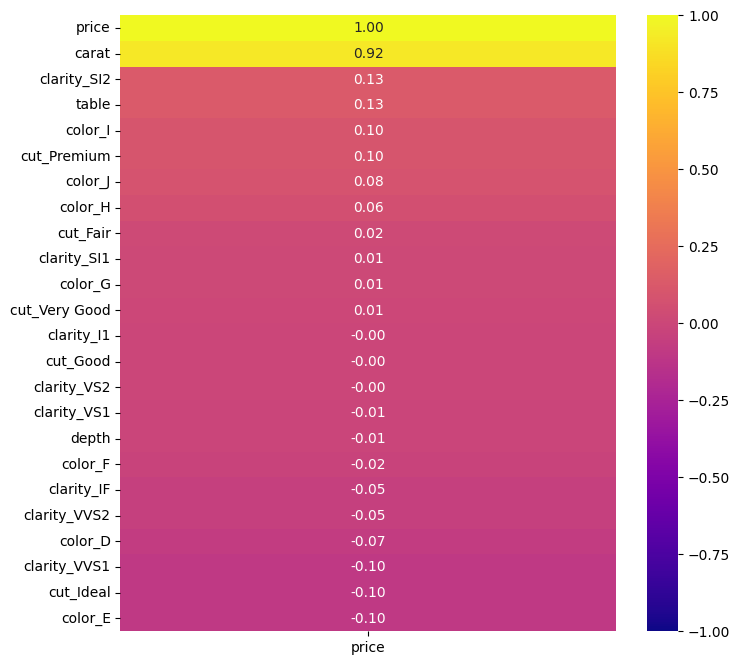

In [29]:
# Question 6 - With Heatmap including only price column

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=diamondDummies.corr()[['price']].sort_values('price', ascending=False),
            annot=True, cmap='plasma', vmin=-1, vmax=1, fmt='.2f')

In [30]:
# Question 7

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diamondsTrain, diamondsTest =train_test_split(diamondDummies,
                                               test_size=0.30, random_state=42)

In [31]:
# Question 8

diammondModel = LinearRegression()
xCols = ['carat', 'clarity_SI2', 'table', 'color_I', 'cut_Premium']
diammondModel.fit(diamondsTrain[xCols], diamondsTrain['price'])

LinearRegression()

In [32]:
# Question 9

diammondModel.score(diamondsTest[xCols], diamondsTest['price'])

0.8693102670849093

In [33]:
# Question 10

diammondModel.score(diamondsTrain[xCols], diamondsTrain['price'])

0.8688884419641665

In [34]:
# Question 11

diamondPredict = diammondModel.predict(diamondsTest[xCols])
diamondPredict

array([-229.22909934, 2482.28979941, 1149.69802328, ..., 9921.50367324,
       3265.86818183, 1079.7136275 ])

In [35]:
# Question 12

diamondsPredicted = pd.DataFrame(diamondPredict, columns=['predictedPrice'])

diamondsFinal = diamondsPredicted.join([diamondsTest[xCols].reset_index(drop=True),
                                        diamondsTest['price'].reset_index(drop=True)])
diamondsFinal[['carat', 'clarity_SI2', 'table', 'color_I', 'cut_Premium', 'price', 'predictedPrice']]

,carat,clarity_SI2,table,color_I,cut_Premium,price,predictedPrice
0,-1.177071,False,-0.652139,False,False,559,-229.229099
1,-0.459782,False,-0.204605,False,False,2201,2482.289799
2,-0.839523,False,-1.099672,False,False,1238,1149.698023
3,-0.776233,False,-0.204605,False,True,1304,1296.093454
4,1.586602,True,-1.099672,False,False,6901,9205.279246
...,...,...,...,...,...,...,...
16177,-0.818426,False,0.690462,False,True,705,992.506822
16178,0.552862,False,-1.099672,False,False,5278,6549.086771
16179,1.502215,False,1.137995,False,True,13157,9921.503673
16180,-0.185524,False,1.585529,False,False,2960,3265.868182


In [36]:
# Question 13
diamondsFinal['residuals'] = diamondsFinal.price - diamondsFinal.predictedPrice
diamondsFinal

,predictedPrice,carat,clarity_SI2,table,color_I,cut_Premium,price,residuals
0,-229.229099,-1.177071,False,-0.652139,False,False,559,788.229099
1,2482.289799,-0.459782,False,-0.204605,False,False,2201,-281.289799
2,1149.698023,-0.839523,False,-1.099672,False,False,1238,88.301977
3,1296.093454,-0.776233,False,-0.204605,False,True,1304,7.906546
4,9205.279246,1.586602,True,-1.099672,False,False,6901,-2304.279246
...,...,...,...,...,...,...,...,...
16177,992.506822,-0.818426,False,0.690462,False,True,705,-287.506822
16178,6549.086771,0.552862,False,-1.099672,False,False,5278,-1271.086771
16179,9921.503673,1.502215,False,1.137995,False,True,13157,3235.496327
16180,3265.868182,-0.185524,False,1.585529,False,False,2960,-305.868182


<Axes: xlabel='residuals', ylabel='Density'>

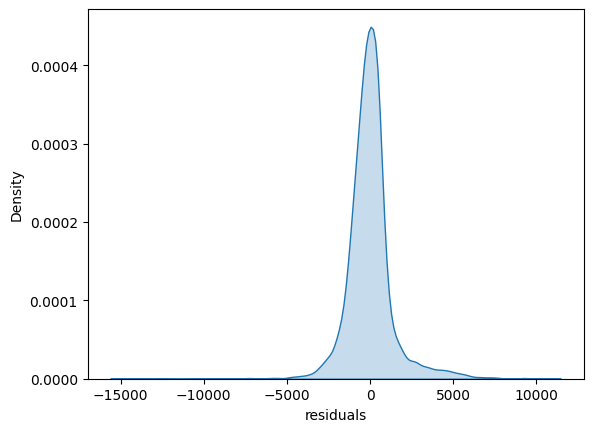

In [37]:
# Question 14

sns.kdeplot(diamondsFinal, x='residuals', fill=True)

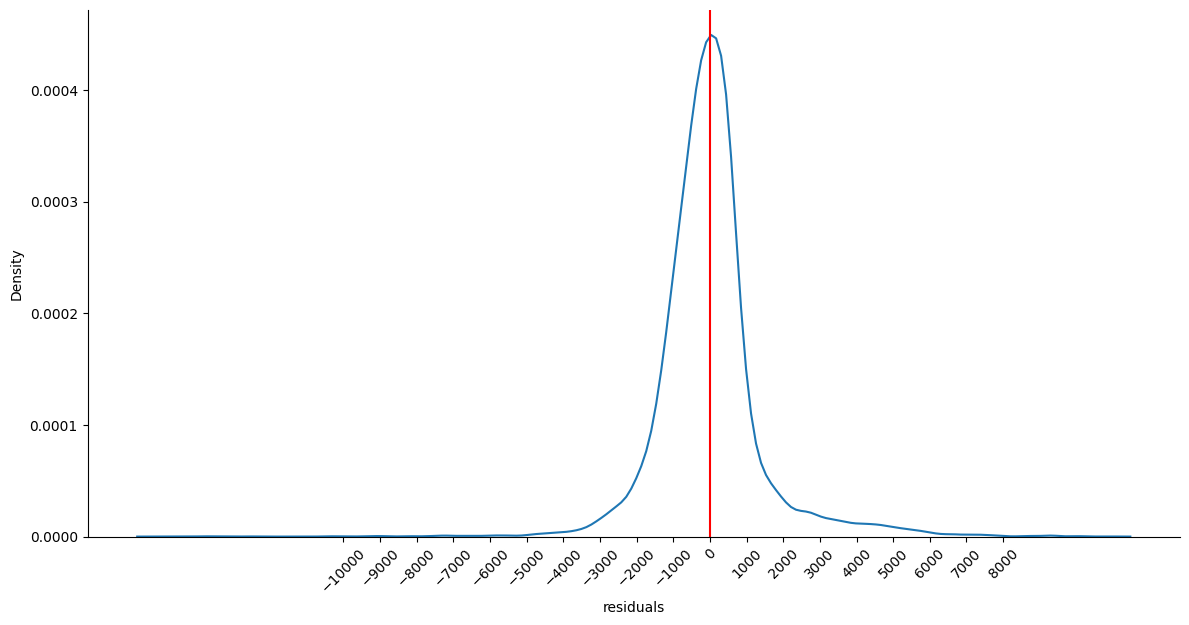

In [38]:
# Question 14 - Alternative
import numpy as np
import matplotlib.pyplot as plt
sns.displot(diamondsFinal, x='residuals', kind='kde', height=6, aspect=2)
step = 1000
ticks = np.arange(-10000, 9000, step)
plt.xticks(ticks=ticks, rotation=45)
plt.axvline(x=0, color='red', linestyle='solid', label='Low')
plt.show()


## Use Scikit learn to select the most significant independent variables

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [40]:
# There are no non-numeric columns in the diamondsDummies DataFrame that have to be dropped before procedding.
diamondDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   cut_Ideal      53940 non-null  bool   
 5   cut_Premium    53940 non-null  bool   
 6   cut_Very Good  53940 non-null  bool   
 7   cut_Good       53940 non-null  bool   
 8   cut_Fair       53940 non-null  bool   
 9   color_D        53940 non-null  bool   
 10  color_E        53940 non-null  bool   
 11  color_F        53940 non-null  bool   
 12  color_G        53940 non-null  bool   
 13  color_H        53940 non-null  bool   
 14  color_I        53940 non-null  bool   
 15  color_J        53940 non-null  bool   
 16  clarity_IF     53940 non-null  bool   
 17  clarity_VVS1   53940 non-null  bool   
 18  clarit

In [41]:
diadiamondsTrain, diamondsTest =train_test_split(diamondDummies,
                                               test_size=0.30, random_state=42)

In [42]:
fs = SelectKBest(score_func=mutual_info_regression, k=23)
fs.fit(diamondsTrain.drop(columns=['price']), diamondsTrain['price'])

SelectKBest(k=23,
            score_func=<function mutual_info_regression at 0x00000240D9DA6B60>)

In [43]:
diamondsTrain_fs = fs.transform(diamondsTrain.drop(columns=['price']))
diamondsTest_fs = fs.transform(diamondsTest.drop(columns=['price']))

In [44]:
model = LinearRegression()
model.fit(diamondsTrain_fs, diamondsTrain['price'])
model.score(diamondsTest_fs, diamondsTest['price'])

0.9161822955952986

In [45]:
model.score(diamondsTrain_fs, diamondsTrain['price'])

0.9159661291924073

In [46]:
# Discover the importance/significance of the independent variables

df1 = pd.DataFrame(diadiamondsTrain.drop(columns=['price']).columns, columns=['feature'])
df2 = pd.DataFrame(fs.scores_, columns=['significance'])
significance = df1.join(df2)
significance.sort_values('significance', ascending=False)

,feature,significance
0,carat,1.896733
20,clarity_SI1,0.087670
19,clarity_VS2,0.087650
21,clarity_SI2,0.080720
9,color_E,0.071830
8,color_D,0.066823
11,color_G,0.061907
10,color_F,0.061263
17,clarity_VVS2,0.049461
3,cut_Ideal,0.048111


In [47]:
diammondModel = LinearRegression()
xCols = ['carat', 'clarity_VS2', 'clarity_SI1', 'clarity_SI2', 'color_E',
         'color_D', 'color_G', 'color_F', 'cut_Ideal', 'clarity_VVS2',
         'clarity_VS1', 'clarity_VVS1', 'color_H', 'table', 'cut_Premium', 'depth']
diammondModel.fit(diamondsTrain[xCols], diamondsTrain['price'])

LinearRegression()

In [48]:
diammondModel.score(diamondsTest[xCols], diamondsTest['price'])

0.8967485362660721

In [49]:
diammondModel.score(diamondsTrain[xCols], diamondsTrain['price'])

0.8951565707257282

In [50]:
price_predicted = diammondModel.predict(diamondsTest[xCols])

In [51]:
predicted = pd.DataFrame(price_predicted, columns=['predictedPrice'])
final = predicted.join([diamondsTest[xCols].reset_index(drop=True),
                        diamondsTest['price'].reset_index(drop=True)])
final['residuals'] = final.price - final.predictedPrice
final[['price', 'predictedPrice', 'residuals']]

,price,predictedPrice,residuals
0,559,455.118505,103.881495
1,2201,3393.217838,-1192.217838
2,1238,2012.754908,-774.754908
3,1304,2189.547107,-885.547107
4,6901,9744.475730,-2843.475730
...,...,...,...
16177,705,559.906229,145.093771
16178,5278,5640.706265,-362.706265
16179,13157,10440.675172,2716.324828
16180,2960,4384.273997,-1424.273997


<Axes: xlabel='residuals', ylabel='Density'>

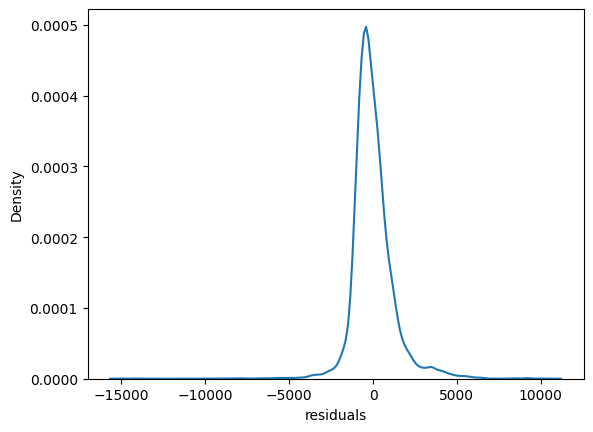

In [52]:
sns.kdeplot(final, x='residuals')

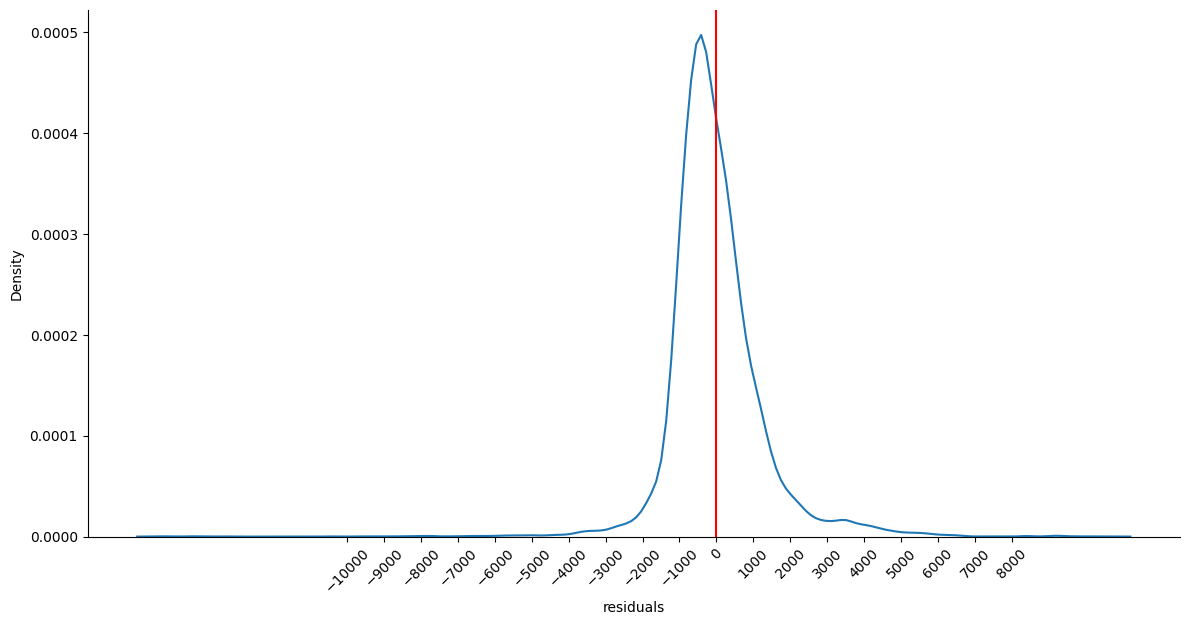

In [53]:
import numpy as np
import matplotlib.pyplot as plt
sns.displot(final, x='residuals', kind='kde', height=6, aspect=2)
step = 1000
ticks = np.arange(-10000, 9000, step)
plt.xticks(ticks=ticks, rotation=45)
plt.axvline(x=0, color='red', linestyle='solid', label='Low')
plt.show()

## Selecting the right number of independent variables

C:\Users\s225146371\AppData\Local\Temp\ipykernel_6028\2178241825.py:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numVaribles = df.numVariables + 1


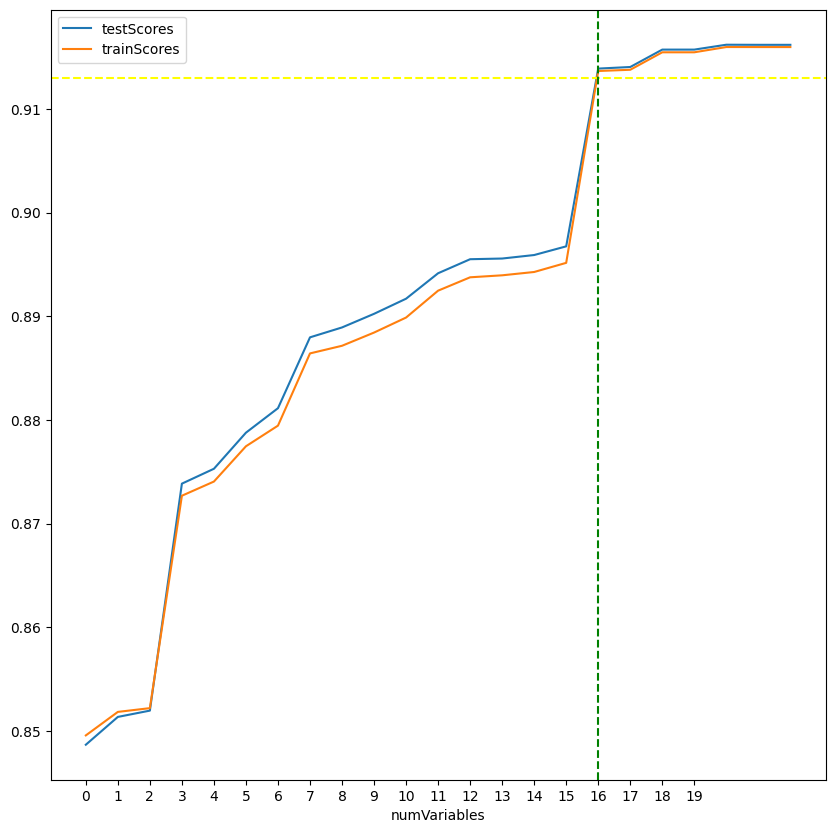

In [54]:
# Question 15

import numpy as np
model = LinearRegression()
test = []
train =[]

for i in range(1, len(diamondsTrain.columns)):
    fs = SelectKBest(score_func=mutual_info_regression, k=i)
    fs.fit(diamondsTrain.drop(columns=['price']), diamondsTrain['price'])

    diamondsTrain_fs = fs.transform(diamondsTrain.drop(columns=['price']))
    diamondsTest_fs = fs.transform(diamondsTest.drop(columns=['price']))

    model.fit(diamondsTrain_fs, diamondsTrain['price'])

    testScore = model.score(diamondsTest_fs, diamondsTest['price'])
    trainScore = model.score(diamondsTrain_fs, diamondsTrain['price'])
    test.append(testScore)
    train.append(trainScore)

df = pd.DataFrame(data={'testScores': test, 'trainScores': train})
df.reset_index(inplace=True)
df.rename(columns={'index': 'numVariables'}, inplace=True)
df.numVaribles = df.numVariables + 1
ax = df.plot(x='numVariables', y=['testScores', 'trainScores'], figsize=(10, 10))
plt.axhline(y=0.913, color='yellow', linestyle='--', label='0.913')
plt.axvline(x=16, color='green', linestyle='--')
plt.xticks(np.arange(0, 20, step=1))
plt.show()